In [ ]:
!pip install nltk

In [ ]:
!pip install gensim

In [ ]:
!pip install spacy

In [ ]:
!pip install plotly

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from collections import Counter

In [ ]:
import operator

In [ ]:
import plotly.express as px

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install jupyterthemes

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [ ]:
from tensorflow.keras.models import Model

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving small_vocab_en.csv to small_vocab_en (1).csv


In [ ]:
def_english=pd.read_csv('small_vocab_en.csv', sep='/t', names=['english'])

<ipython-input-94-6d0148786ebd>:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving small_vocab_fr.csv to small_vocab_fr (1).csv


In [ ]:
def_french=pd.read_csv('small_vocab_fr.csv', sep='/t', names=['french'])

<ipython-input-96-e59cd4dfe1e6>:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [ ]:
def_english.shape

(137860, 1)

In [ ]:
def_french.shape

(137860, 1)

In [ ]:
def_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [ ]:
def_french.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [ ]:
df=pd.concat([def_english, def_french], axis=1)

In [ ]:
df

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
...,...,...
137855,"france is never busy during march , and it is ...","la france est jamais occupée en mars , et il e..."
137856,"india is sometimes beautiful during spring , a...","l' inde est parfois belle au printemps , et il..."
137857,"india is never wet during summer , but it is s...","l' inde est jamais mouillé pendant l' été , ma..."
137858,"france is never chilly during january , but it...","la france est jamais froid en janvier , mais i..."


In [ ]:
print('Total English Records={}'.format(len(df['english'])))
print('Total French Records={}'.format(len(df['french'])))

Total English Records=137860
Total French Records=137860


##TASK 3

In [ ]:
def remove_punc(x):
  return re.sub('[!#?,.:";]', '', x)

In [ ]:
df['french']=df['french'].apply(remove_punc)
df['engliah']=df['english'].apply(remove_punc)

In [ ]:
english_words=[]
french_words=[]

In [ ]:
def get_unique_words(x, word_list):
  for word in x.split():
    if word not in word_list:
      word_list.append(word)

df['english'].apply(lambda x: get_unique_words(x, english_words))
df['french'].apply(lambda x: get_unique_words(x, french_words))

english_words


['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 ',',
 'and',
 'it',
 'snowy',
 'in',
 'april',
 '.',
 'the',
 'united',
 'states',
 'usually',
 'chilly',
 'july',
 'freezing',
 'november',
 'california',
 'march',
 'hot',
 'june',
 'mild',
 'cold',
 'september',
 'your',
 'least',
 'liked',
 'fruit',
 'grape',
 'but',
 'my',
 'apple',
 'his',
 'favorite',
 'orange',
 'paris',
 'relaxing',
 'december',
 'busy',
 'spring',
 'never',
 'our',
 'lemon',
 'january',
 'warm',
 'lime',
 'her',
 'banana',
 'he',
 'saw',
 'a',
 'old',
 'yellow',
 'truck',
 'india',
 'rainy',
 'that',
 'cat',
 'was',
 'most',
 'loved',
 'animal',
 'dislikes',
 'grapefruit',
 'limes',
 'lemons',
 'february',
 'china',
 'pleasant',
 'october',
 'wonderful',
 'nice',
 'summer',
 'france',
 'may',
 'grapes',
 'mangoes.',
 'their',
 'mango',
 'pear',
 'august',
 'beautiful',
 'apples',
 'peaches',
 'feared',
 'shark',
 'wet',
 'dry',
 'we',
 'like',
 'oranges',
 'mangoes',
 'they',
 'pears',
 

In [ ]:
french_words

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il',
 'neigeux',
 'en',
 'avril',
 'les',
 'états-unis',
 'généralement',
 'froid',
 'juillet',
 'gèle',
 'habituellement',
 'novembre',
 'california',
 'mars',
 'chaud',
 'juin',
 'légère',
 'fait',
 'septembre',
 'votre',
 'moins',
 'aimé',
 'fruit',
 'le',
 'raisin',
 'mais',
 'mon',
 'la',
 'pomme',
 'son',
 'préféré',
 "l'orange",
 'paris',
 'relaxant',
 'décembre',
 'occupé',
 'au',
 'printemps',
 'jamais',
 'chaude',
 'notre',
 'citron',
 'janvier',
 'chaux',
 'des',
 'fruits',
 'banane',
 'a',
 'vu',
 'un',
 'vieux',
 'camion',
 'jaune',
 'inde',
 'pluvieux',
 'ce',
 'chat',
 'était',
 'animal',
 'plus',
 "n'aime",
 'pamplemousse',
 'citrons',
 'verts',
 'californie',
 'ne',
 'février',
 'gel',
 'chine',
 'agréable',
 'octobre',
 'merveilleux',
 'doux',
 'tranquille',
 'à',
 "l'automne",
 'été',
 'france',
 'mois',
 'de',
 'mai',
 'frisquet',
 'déteste',
 'raisins',
 'mangues',
 'leur',
 'm

In [ ]:
total_english_words=len(english_words)
total_english_words

227

In [ ]:
total_french_words=len(french_words)
total_french_words

350

# Task 4

In [ ]:
words=[]
for i in df['english']:
  for word in i.split():
    words.append(word)

words



['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 ',',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 '.',
 'the',
 'united',
 'states',
 'is',
 'usually',
 'chilly',
 'during',
 'july',
 ',',
 'and',
 'it',
 'is',
 'usually',
 'freezing',
 'in',
 'november',
 '.',
 'california',
 'is',
 'usually',
 'quiet',
 'during',
 'march',
 ',',
 'and',
 'it',
 'is',
 'usually',
 'hot',
 'in',
 'june',
 '.',
 'the',
 'united',
 'states',
 'is',
 'sometimes',
 'mild',
 'during',
 'june',
 ',',
 'and',
 'it',
 'is',
 'cold',
 'in',
 'september',
 '.',
 'your',
 'least',
 'liked',
 'fruit',
 'is',
 'the',
 'grape',
 ',',
 'but',
 'my',
 'least',
 'liked',
 'is',
 'the',
 'apple',
 '.',
 'his',
 'favorite',
 'fruit',
 'is',
 'the',
 'orange',
 ',',
 'but',
 'my',
 'favorite',
 'is',
 'the',
 'grape',
 '.',
 'paris',
 'is',
 'relaxing',
 'during',
 'december',
 ',',
 'but',
 'it',
 'is',
 'usually',
 'chilly',
 'in',
 'july',
 '.',
 'new',
 'jersey',
 'is',
 'busy',
 'during'

In [ ]:
english_words_counts= Counter(words)
english_words_counts

Counter({'new': 12197,
         'jersey': 11225,
         'is': 205858,
         'sometimes': 37746,
         'quiet': 8693,
         'during': 74933,
         'autumn': 9004,
         ',': 140897,
         'and': 59850,
         'it': 75137,
         'snowy': 8898,
         'in': 75525,
         'april': 8954,
         '.': 129039,
         'the': 67628,
         'united': 11270,
         'states': 11270,
         'usually': 37507,
         'chilly': 8770,
         'july': 8956,
         'freezing': 8928,
         'november': 8951,
         'california': 11250,
         'march': 9023,
         'hot': 8639,
         'june': 9133,
         'mild': 8743,
         'cold': 8878,
         'september': 8958,
         'your': 9734,
         'least': 27564,
         'liked': 13546,
         'fruit': 27105,
         'grape': 4703,
         'but': 63987,
         'my': 9700,
         'apple': 4652,
         'his': 9700,
         'favorite': 27371,
         'orange': 4651,
         'paris': 11334

In [ ]:
english_words_counts=sorted(english_words_counts.items(), key=operator.itemgetter(1), reverse=True)

In [ ]:
english_words_counts

[('is', 205858),
 (',', 140897),
 ('.', 129039),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('least', 27564),
 ('favorite', 27371),
 ('fruit', 27105),
 ('most', 14934),
 ('loved', 13666),
 ('liked', 13546),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10118),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 

In [ ]:
english_words=[]
english_counts=[]
for i in range(len(english_words_counts)):
  english_words.append(english_words_counts[i][0])
  english_counts.append(english_words_counts[i][1])

In [ ]:
english_words

['is',
 ',',
 '.',
 'in',
 'it',
 'during',
 'the',
 'but',
 'and',
 'sometimes',
 'usually',
 'never',
 'least',
 'favorite',
 'fruit',
 'most',
 'loved',
 'liked',
 'new',
 'paris',
 'india',
 'united',
 'states',
 'california',
 'jersey',
 'france',
 'china',
 'he',
 'she',
 'grapefruit',
 'your',
 'my',
 'his',
 'her',
 'fall',
 'june',
 'spring',
 'january',
 'winter',
 'march',
 'autumn',
 'may',
 'nice',
 'september',
 'july',
 'april',
 'november',
 'summer',
 'december',
 'february',
 'our',
 'their',
 'freezing',
 'pleasant',
 'beautiful',
 'october',
 'snowy',
 'warm',
 'cold',
 'wonderful',
 'dry',
 'busy',
 'august',
 'chilly',
 'rainy',
 'mild',
 'wet',
 'relaxing',
 'quiet',
 'hot',
 'dislikes',
 'likes',
 'limes',
 'mangoes',
 'lemons',
 'grapes',
 'apples',
 'oranges',
 'strawberries',
 'bananas',
 'peaches',
 'pears',
 'to',
 'strawberry',
 'grape',
 'lime',
 'apple',
 'lemon',
 'banana',
 'mango',
 'pear',
 'peach',
 'orange',
 'like',
 'dislike',
 'they',
 'that',
 

In [ ]:
english_counts

[205858,
 140897,
 129039,
 75525,
 75137,
 74933,
 67628,
 63987,
 59850,
 37746,
 37507,
 37500,
 27564,
 27371,
 27105,
 14934,
 13666,
 13546,
 12197,
 11334,
 11277,
 11270,
 11270,
 11250,
 11225,
 11170,
 10953,
 10786,
 10786,
 10118,
 9734,
 9700,
 9700,
 9700,
 9134,
 9133,
 9102,
 9090,
 9038,
 9023,
 9004,
 8995,
 8984,
 8958,
 8956,
 8954,
 8951,
 8948,
 8945,
 8942,
 8932,
 8932,
 8928,
 8916,
 8915,
 8910,
 8898,
 8890,
 8878,
 8808,
 8794,
 8791,
 8789,
 8770,
 8761,
 8743,
 8726,
 8696,
 8693,
 8639,
 7314,
 7314,
 5554,
 5549,
 5533,
 5525,
 5452,
 5452,
 5452,
 5452,
 5451,
 5451,
 5166,
 4715,
 4703,
 4680,
 4652,
 4652,
 4652,
 4652,
 4652,
 4652,
 4651,
 4588,
 4444,
 3222,
 2712,
 2664,
 2532,
 2414,
 2304,
 1944,
 1944,
 1944,
 1944,
 1867,
 1666,
 1386,
 1296,
 1224,
 1016,
 1016,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 972,
 961,
 870,
 811,
 781,
 768,
 768,
 768,
 714,
 666,
 648,
 648,
 648,
 648,
 574,
 540,
 500,
 500,
 480,
 476,
 393,
 393,
 39

In [ ]:
fig=px.bar(x=english_words, y=english_counts)
fig.show()

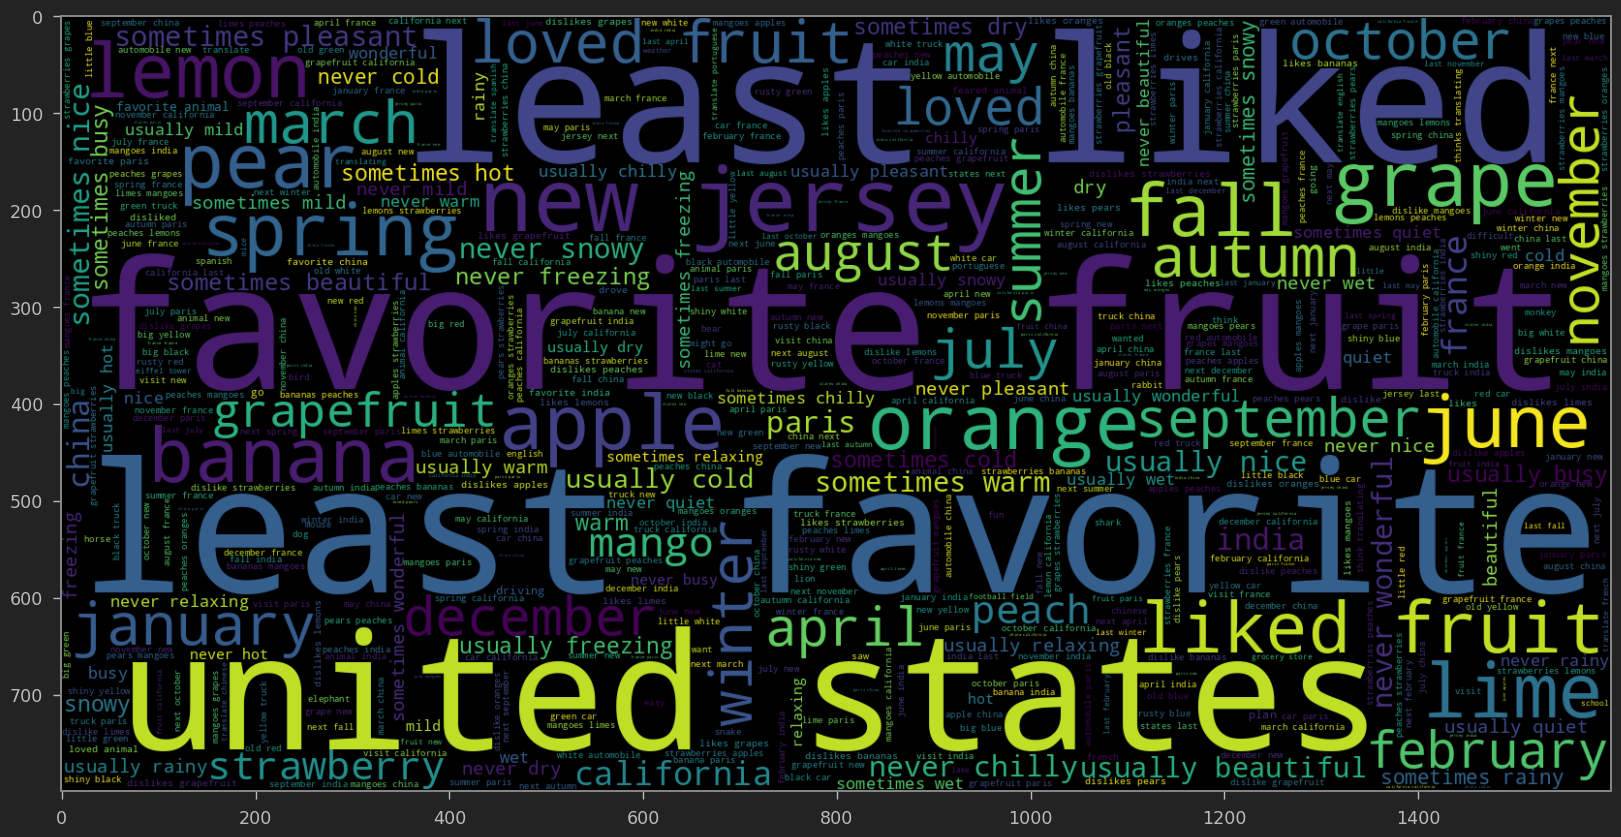

In [ ]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(df.english))
plt.imshow(wc, interpolation='bilinear')

In [ ]:
df.english[0]
nltk.word_tokenize(df.english[0])


['new',
 'jersey',
 'is',
 'sometimes',
 'quiet',
 'during',
 'autumn',
 ',',
 'and',
 'it',
 'is',
 'snowy',
 'in',
 'april',
 '.']

In [ ]:
from pygments import token
maxlen_english=-1
for doc in df.english:
  tokens=nltk.word_tokenize(doc)
  if(maxlen_english<len(tokens)):
    maxlen_english=len(tokens)

print("The maximum number of words in any document =", maxlen_english)

The maximum number of words in any document = 17


In [ ]:
words=[]
for i in df['french']:
  for word in i.split():
    words.append(word)

words


['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 "l'",
 'automne',
 'et',
 'il',
 'est',
 'neigeux',
 'en',
 'avril',
 'les',
 'états-unis',
 'est',
 'généralement',
 'froid',
 'en',
 'juillet',
 'et',
 'il',
 'gèle',
 'habituellement',
 'en',
 'novembre',
 'california',
 'est',
 'généralement',
 'calme',
 'en',
 'mars',
 'et',
 'il',
 'est',
 'généralement',
 'chaud',
 'en',
 'juin',
 'les',
 'états-unis',
 'est',
 'parfois',
 'légère',
 'en',
 'juin',
 'et',
 'il',
 'fait',
 'froid',
 'en',
 'septembre',
 'votre',
 'moins',
 'aimé',
 'fruit',
 'est',
 'le',
 'raisin',
 'mais',
 'mon',
 'moins',
 'aimé',
 'est',
 'la',
 'pomme',
 'son',
 'fruit',
 'préféré',
 'est',
 "l'orange",
 'mais',
 'mon',
 'préféré',
 'est',
 'le',
 'raisin',
 'paris',
 'est',
 'relaxant',
 'en',
 'décembre',
 'mais',
 'il',
 'est',
 'généralement',
 'froid',
 'en',
 'juillet',
 'new',
 'jersey',
 'est',
 'occupé',
 'au',
 'printemps',
 'et',
 'il',
 'est',
 'jamais',
 'chaude',
 'en',
 'mars',
 'n

In [ ]:
french_words_counts= Counter(words)
french_words_counts

Counter({'new': 11047,
         'jersey': 11052,
         'est': 196809,
         'parfois': 37746,
         'calme': 7256,
         'pendant': 10741,
         "l'": 32917,
         'automne': 14727,
         'et': 59851,
         'il': 84079,
         'neigeux': 1867,
         'en': 105768,
         'avril': 8954,
         'les': 65255,
         'états-unis': 11210,
         'généralement': 31292,
         'froid': 16794,
         'juillet': 8956,
         'gèle': 3622,
         'habituellement': 6215,
         'novembre': 8951,
         'california': 3061,
         'mars': 9023,
         'chaud': 16405,
         'juin': 9133,
         'légère': 63,
         'fait': 2916,
         'septembre': 8958,
         'votre': 9368,
         'moins': 27557,
         'aimé': 25852,
         'fruit': 23626,
         'le': 35306,
         'raisin': 4852,
         'mais': 63987,
         'mon': 9403,
         'la': 49861,
         'pomme': 4848,
         'son': 16496,
         'préféré': 23305,
   

In [ ]:
french_words_counts=sorted(french_words_counts.items(), key=operator.itemgetter(1), reverse=True)
french_words_counts

[('est', 196809),
 ('en', 105768),
 ('il', 84079),
 ('les', 65255),
 ('mais', 63987),
 ('et', 59851),
 ('la', 49861),
 ('parfois', 37746),
 ('jamais', 37215),
 ('le', 35306),
 ("l'", 32917),
 ('généralement', 31292),
 ('moins', 27557),
 ('aimé', 25852),
 ('au', 25738),
 ('fruit', 23626),
 ('préféré', 23305),
 ('agréable', 17751),
 ('froid', 16794),
 ('son', 16496),
 ('chaud', 16405),
 ('de', 15070),
 ('plus', 14934),
 ('automne', 14727),
 ('mois', 14350),
 ('à', 13870),
 ('elle', 12056),
 ('citrons', 11679),
 ('paris', 11334),
 ('inde', 11277),
 ('états-unis', 11210),
 ('france', 11170),
 ('jersey', 11052),
 ('new', 11047),
 ('chine', 10936),
 ('pendant', 10741),
 ('pamplemousse', 10140),
 ('mon', 9403),
 ('votre', 9368),
 ('juin', 9133),
 ('printemps', 9100),
 ('janvier', 9090),
 ('hiver', 9038),
 ('mars', 9023),
 ('été', 8999),
 ('mai', 8995),
 ('septembre', 8958),
 ('juillet', 8956),
 ('avril', 8954),
 ('novembre', 8951),
 ('décembre', 8945),
 ('février', 8942),
 ('octobre', 8911),


In [ ]:
french_words=[]
french_counts=[]
for i in range(len(french_words_counts)):
  french_words.append(french_words_counts[i][0])
  french_counts.append(french_words_counts[i][1])


french_words

['est',
 'en',
 'il',
 'les',
 'mais',
 'et',
 'la',
 'parfois',
 'jamais',
 'le',
 "l'",
 'généralement',
 'moins',
 'aimé',
 'au',
 'fruit',
 'préféré',
 'agréable',
 'froid',
 'son',
 'chaud',
 'de',
 'plus',
 'automne',
 'mois',
 'à',
 'elle',
 'citrons',
 'paris',
 'inde',
 'états-unis',
 'france',
 'jersey',
 'new',
 'chine',
 'pendant',
 'pamplemousse',
 'mon',
 'votre',
 'juin',
 'printemps',
 'janvier',
 'hiver',
 'mars',
 'été',
 'mai',
 'septembre',
 'juillet',
 'avril',
 'novembre',
 'décembre',
 'février',
 'octobre',
 'aime',
 'août',
 'merveilleux',
 'relaxant',
 'doux',
 'humide',
 'notre',
 'californie',
 'sec',
 'leur',
 'occupé',
 'pluvieux',
 'calme',
 'beau',
 'habituellement',
 'pommes',
 'pêches',
 'oranges',
 'poires',
 'fraises',
 'bananes',
 'verts',
 'raisins',
 'mangues',
 "d'",
 'mangue',
 'gel',
 'raisin',
 'pomme',
 "l'orange",
 'citron',
 'chaux',
 'banane',
 'poire',
 'fraise',
 'pêche',
 'pas',
 'enneigée',
 'favori',
 'déteste',
 'gèle',
 'fruits',
 '

In [ ]:
french_counts

[196809,
 105768,
 84079,
 65255,
 63987,
 59851,
 49861,
 37746,
 37215,
 35306,
 32917,
 31292,
 27557,
 25852,
 25738,
 23626,
 23305,
 17751,
 16794,
 16496,
 16405,
 15070,
 14934,
 14727,
 14350,
 13870,
 12056,
 11679,
 11334,
 11277,
 11210,
 11170,
 11052,
 11047,
 10936,
 10741,
 10140,
 9403,
 9368,
 9133,
 9100,
 9090,
 9038,
 9023,
 8999,
 8995,
 8958,
 8956,
 8954,
 8951,
 8945,
 8942,
 8911,
 8870,
 8789,
 8704,
 8458,
 8458,
 8446,
 8319,
 8189,
 7957,
 7855,
 7782,
 7658,
 7256,
 6387,
 6215,
 5844,
 5844,
 5844,
 5844,
 5844,
 5844,
 5835,
 5780,
 5774,
 5100,
 4899,
 4886,
 4852,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4848,
 4495,
 4008,
 3857,
 3743,
 3622,
 3566,
 3510,
 3411,
 3185,
 3131,
 3061,
 3016,
 2916,
 2726,
 2715,
 2520,
 2517,
 2435,
 2248,
 1944,
 1927,
 1867,
 1706,
 1666,
 1548,
 1465,
 1437,
 1356,
 1308,
 1278,
 1239,
 1198,
 1180,
 1124,
 1116,
 1111,
 1111,
 1094,
 1072,
 1053,
 1018,
 1001,
 972,
 972,
 966,
 908,
 837,
 836,
 834,
 7

In [ ]:
fig=px.bar(x=french_words, y=french_counts)
fig.show()

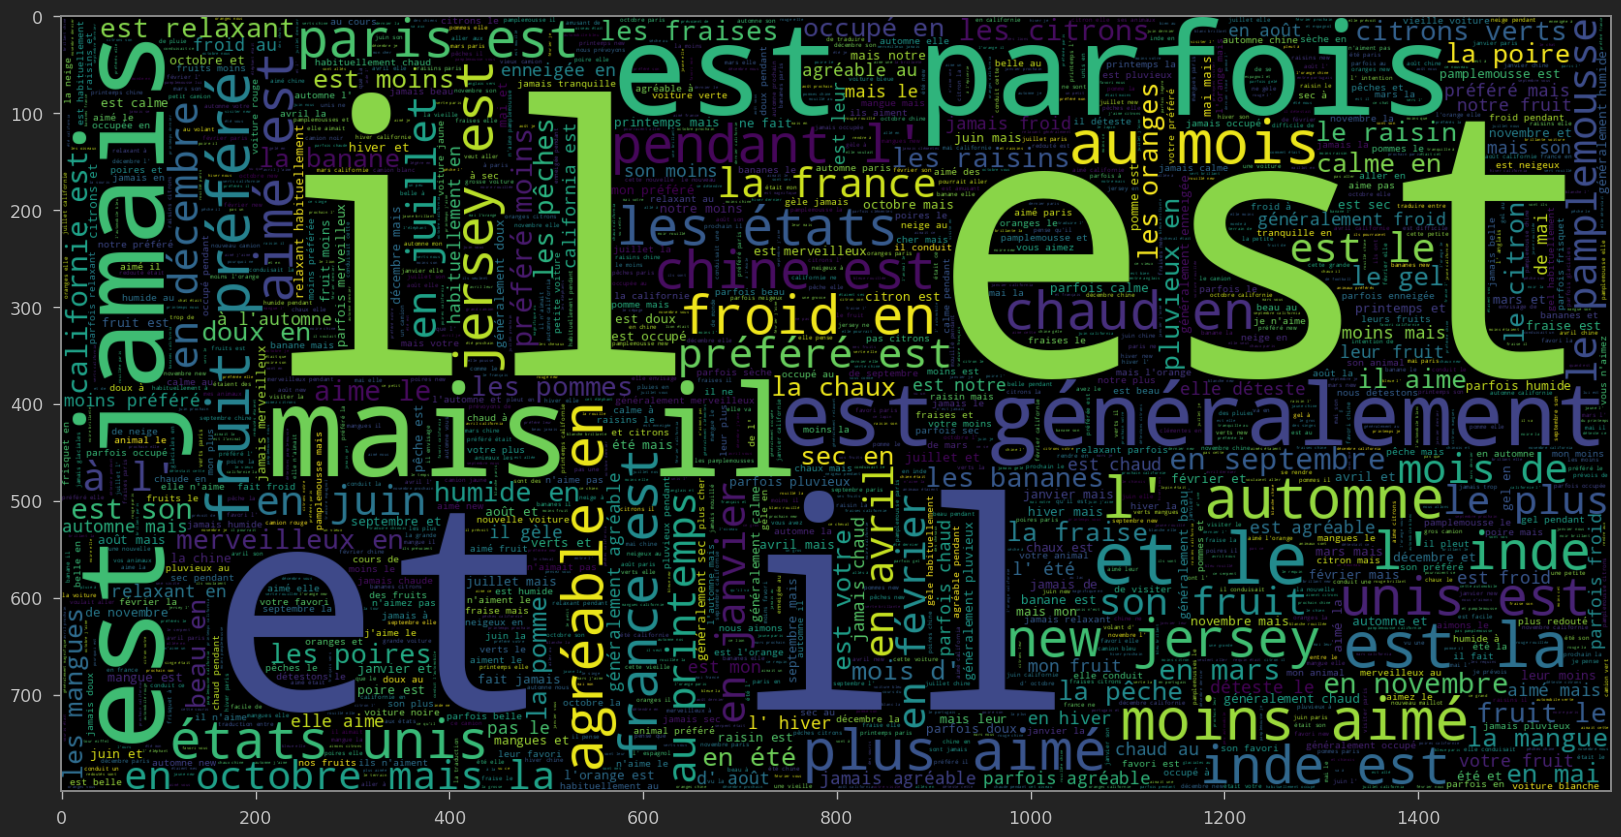

In [ ]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(df.french))
plt.imshow(wc, interpolation='bilinear')

In [ ]:
df.french[0]
nltk.word_tokenize(df.french[0])

['new',
 'jersey',
 'est',
 'parfois',
 'calme',
 'pendant',
 'l',
 "'",
 'automne',
 'et',
 'il',
 'est',
 'neigeux',
 'en',
 'avril']

In [ ]:
from pygments import token
maxlen_french=-1
for doc in df.french:
  tokens=nltk.word_tokenize(doc)
  if(maxlen_french<len(tokens)):
    maxlen_french=len(tokens)

print("The maximum number of words in any document =", maxlen_french)

The maximum number of words in any document = 23


#TASK 5

In [ ]:
from IPython.core.displayhook import tokenize
def tokenize_and_pad(x, maxlen):
  tokenizer=Tokenizer(char_level=False)
  tokenizer.fit_on_texts(x)
  sequences=tokenizer.texts_to_sequences(x)
  padded=pad_sequences(sequences, maxlen=maxlen, padding='post')
  return tokenizer, sequences, padded

In [ ]:
x_tokenizer, x_sequences, x_padded=tokenize_and_pad(df.english, maxlen_french)


In [ ]:
print("The tokenized version for document\n", df.english[-1:].item(), "\n is :", x_padded[-1:])

The tokenized version for document
 the orange is her favorite fruit , but the banana is your favorite . 
 is : [[ 5 84  1 32 11 13  6  5 87  1 29 11  0  0  0  0  0  0  0  0  0  0  0]]


In [ ]:
y_tokenzier, y_sequences, y_padded=tokenize_and_pad(df.french, maxlen_french)

In [ ]:
print("The tokenized version for document\n", df.french[-1:].item(), "\n is :", y_padded[-1:])

The tokenized version for document
 l'orange est son fruit préféré  mais la banane est votre favori  
 is : [[84  1 20 16 17  5  7 87  1 40 93  0  0  0  0  0  0  0  0  0  0  0  0]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_padded, y_padded, test_size=0.1)

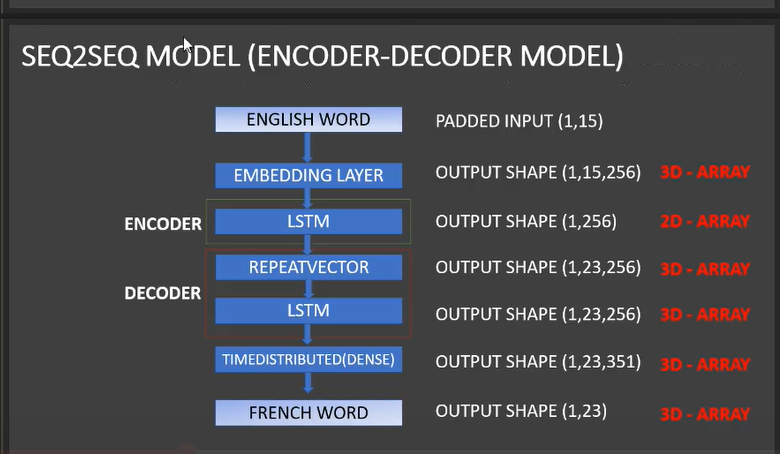

#TASK 6


In [155]:
english_vocab_size=total_english_words + 1
french_vocab_size= total_french_words + 1

model=Sequential()

model.add(Embedding(english_vocab_size, 256, input_length=23, mask_zero=True))  # input_length=maxlen-english

model.add(LSTM(256))

model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences=True))
model.add(TimeDistributed(Dense(french_vocab_size, activation='softmax')))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 23, 256)           58368     
                                                                 
 lstm_14 (LSTM)              (None, 256)               525312    
                                                                 
 repeat_vector_7 (RepeatVec  (None, 23, 256)           0         
 tor)                                                            
                                                                 
 lstm_15 (LSTM)              (None, 23, 256)           525312    
                                                                 
 time_distributed_6 (TimeDi  (None, 23, 351)           90207     
 stributed)                                                      
                                                                 
Total params: 1199199 (4.57 MB)
Trainable params: 1199

In [156]:
y_train=np.expand_dims(y_train, axis=2)
y_train.shape

(124074, 23, 1, 1, 1)

In [157]:
model.fit(x_train, y_train, batch_size=1024, validation_split=0.1, epochs=15) # train on 15 epochs

Epoch 1/15
110/110 [==============================] - 653s 6s/step - loss: 2.6854 - accuracy: 0.3361 - val_loss: 2.1227 - val_accuracy: 0.2766
Epoch 2/15
110/110 [==============================] - 650s 6s/step - loss: 1.8655 - accuracy: 0.2547 - val_loss: 1.6079 - val_accuracy: 0.2451
Epoch 3/15
110/110 [==============================] - 639s 6s/step - loss: 1.5070 - accuracy: 0.2432 - val_loss: 1.3916 - val_accuracy: 0.2417
Epoch 4/15
110/110 [==============================] - 649s 6s/step - loss: 1.3033 - accuracy: 0.2392 - val_loss: 1.2268 - val_accuracy: 0.2427
Epoch 5/15
110/110 [==============================] - 663s 6s/step - loss: 1.1419 - accuracy: 0.2358 - val_loss: 1.0884 - val_accuracy: 0.2352
Epoch 6/15
110/110 [==============================] - 645s 6s/step - loss: 1.0058 - accuracy: 0.2334 - val_loss: 1.0650 - val_accuracy: 0.2436
Epoch 7/15
110/110 [==============================] - 641s 6s/step - loss: 0.9007 - accuracy: 0.2320 - val_loss: 0.8831 - val_accuracy: 0.2349

In [158]:
model.save("weighrs.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



#TASK 9

In [159]:
x_test.shape

(13786, 23)

In [160]:
x_test

array([[ 26, 127,  95, ...,   0,   0,   0],
       [  5,  86,   1, ...,   0,   0,   0],
       [ 19,   1,  51, ...,   0,   0,   0],
       ...,
       [ 26,  70,  71, ...,   0,   0,   0],
       [ 22,   1,   9, ...,   0,   0,   0],
       [ 24,   1,   8, ...,   0,   0,   0]], dtype=int32)

In [161]:
x_test[0]

array([ 26, 127,  95, 109, 118, 103,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [162]:
y_predict=model.predict(x_test)

431/431 [==============================] - 34s 71ms/step


In [163]:
y_predict

array([[[1.46427737e-07, 9.24061442e-06, 6.15787421e-09, ...,
         7.50932898e-08, 2.62746376e-08, 5.08972740e-08],
        [6.34481190e-10, 3.88737863e-06, 5.60227299e-12, ...,
         1.07275622e-09, 2.24945562e-10, 1.02939135e-09],
        [1.92135658e-08, 7.99289555e-05, 2.97395308e-09, ...,
         1.87666593e-08, 4.88592988e-09, 1.17744232e-08],
        ...,
        [9.99938548e-01, 7.79700713e-06, 4.73974751e-06, ...,
         1.58662111e-11, 1.85365980e-12, 7.96913490e-12],
        [9.99938667e-01, 7.84122676e-06, 4.81159304e-06, ...,
         1.56385634e-11, 1.81939880e-12, 7.86084912e-12],
        [9.99938667e-01, 7.83692758e-06, 4.86175486e-06, ...,
         1.54903382e-11, 1.79942389e-12, 7.79261204e-12]],

       [[7.93676680e-09, 2.74937224e-06, 3.59299035e-10, ...,
         6.72238221e-09, 3.00725533e-09, 2.74948331e-09],
        [2.06432338e-09, 1.35183046e-02, 1.13358671e-11, ...,
         1.68971126e-09, 5.83645687e-10, 7.69432851e-10],
        [5.70677949e-10, 

In [164]:
def prediction(x,x_tokenizer=x_tokenizer, y_tokenzier=y_tokenzier):
  predictions=model.predict(x)[0]
  id_to_word={id: word for word, id in y_tokenzier.word_index.items()}
  id_to_word[0]=''
  return ' '.join([id_to_word[j] for j in np.argmax(predictions,1)])

In [165]:
def pad_to_text(padded, tokenizer):
  id_to_word={id:word for word, id in tokenizer.word_index.items()}
  id_to_word[0]= ''
  return ' '.join([id_to_word[j] for j in padded])

In [166]:
for i in range(5):
  print('Original English word-{}\n'.format(pad_to_text(x_test[i], x_tokenizer)))
  print('Original French word-{}\n'.format(pad_to_text(y_test[i], y_tokenzier)))
  print('Predicted French word-{}\n\n\n\n'.format(prediction(x_test[i:i+1])))

Original English word-he saw that little green automobile                 

Original French word-il a vu cette petite voiture verte                

1/1 [==============================] - 0s 29ms/step
Predicted French word-il a vu cette petite voiture voiture                




Original English word-the lime is my most loved fruit but the peach is her most loved         

Original French word-la chaux est mon fruit le plus aimé mais la pêche elle est le plus aimé       

1/1 [==============================] - 0s 35ms/step
Predicted French word-la chaux est son fruit le plus aimé mais la la est est plus plus aimé       




Original English word-india is freezing during april but it is usually wet in spring           

Original French word-l' inde est le gel en avril mais il est généralement humide au printemps         

1/1 [==============================] - 0s 28ms/step
Predicted French word-l' inde est le gel en janvier mais il est est généralement au printemps         




Original